<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Instability_of_Parameter_Estimates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Example: mean and standard deviation

First 10: -0.26951611032632805
First 100: 0.027109073490359778
First 250: -0.020616059111720507
All: -0.038643973513210604



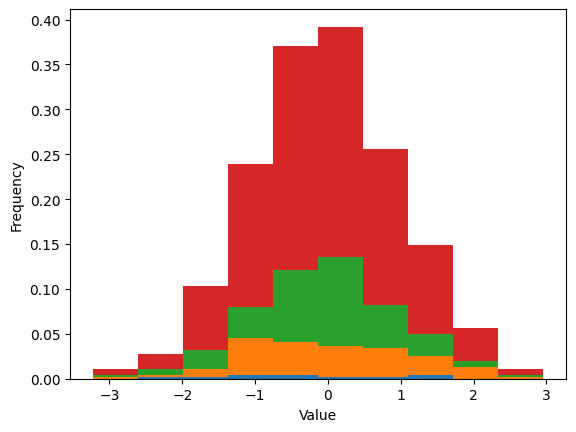

In [2]:
np.random.seed(123)

normal = np.random.randn(500)
print(f'First 10: {np.mean(normal[:10])}')
print(f'First 100: {np.mean(normal[:100])}')
print(f'First 250: {np.mean(normal[:250])}')
print(f'All: {np.mean(normal)}\n')

plt.hist(
    [normal[:10], normal[10:100], normal[100:250], normal],
    density=True, histtype='bar', stacked=True
)
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.show()

In [3]:
print(f'First 10: {np.std(normal[:10])}')
print(f'First 100: {np.std(normal[:100])}')
print(f'First 250: {np.std(normal[:250])}')
print(f'All: {np.std(normal)}\n')

First 10: 1.236304801499023
First 100: 1.128240470477961
First 250: 1.0174604368340197
All: 1.0032028561568238



## Example: Non-Normal Underlying Distribution

Mean: 0.009847581282146528
Standard Deviation: 5.060708740105227


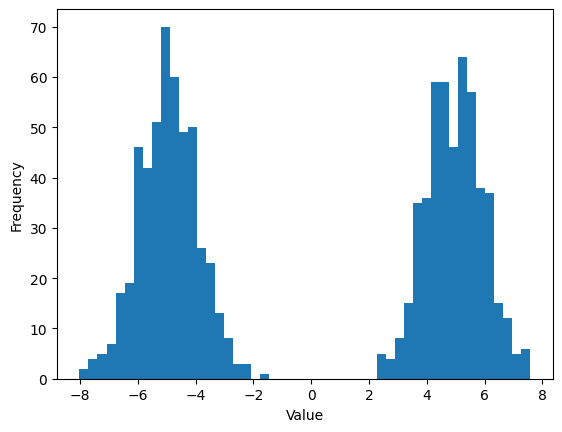

In [4]:
def bimodal(n):
    X = np.zeros((n))
    for i in range(n):
        if np.random.binomial(1, 0.5) == 0:
            X[i] = np.random.normal(-5, 1)
        else:
            X[i] =  np.random.normal(5, 1)
    return X

X = bimodal(1000)

print(f'Mean: {np.mean(X)}')
print(f'Standard Deviation: {np.std(X)}')

#Let's see how it looks
plt.hist(X, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.show()

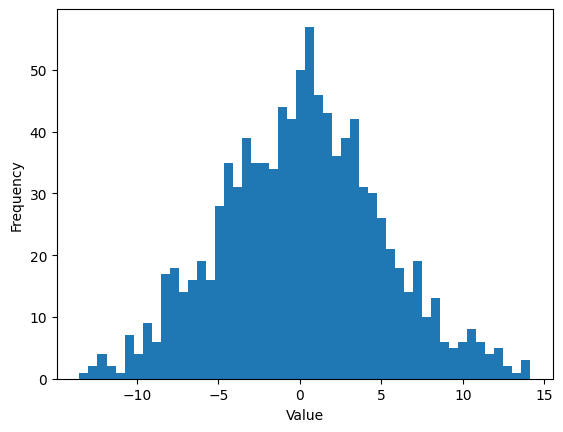

In [5]:
mu = np.mean(X)
sigma = np.std(X)

N = np.random.normal(mu, sigma, 1000)

plt.hist(N, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.show()

In [6]:
from statsmodels.stats.stattools import jarque_bera

jarque_bera(X)

(142.12550136207705,
 1.3735343038981241e-31,
 -0.007644415681800414,
 1.1531707484649847)

### with jarque bera the null hypothesis is that the data follows a normal distribution

## Example: Sharpe Ratio

In [7]:
def sharpe_ratio(asset, riskfree):
    difference = asset - riskfree
    return np.mean(difference) / np.std(difference)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


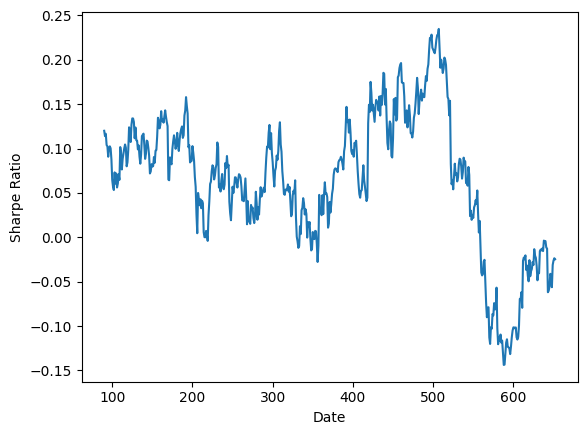

In [8]:
import yfinance as yf

start = '2012-01-01'
end = '2015-01-01'

treasury_return = yf.download('BIL', start=start, end=end)['Close'].pct_change()[1:]
pricing = yf.download('AMZN', start=start, end=end)['Close']
returns = pricing.pct_change()[1:]

running_sharpe = [sharpe_ratio(returns[i-90:i], treasury_return[i-90:i]) for i in range(90, len(returns))]

_, ax1 = plt.subplots()
ax1.plot(range(90, len(returns)-100), running_sharpe[:-100]);
ticks = ax1.get_xticks()
# ax1.set_xticklabels([pricing.index[i].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.show()

Mean: 0.0640651815161509, Standard deviation: 0.077749234173722


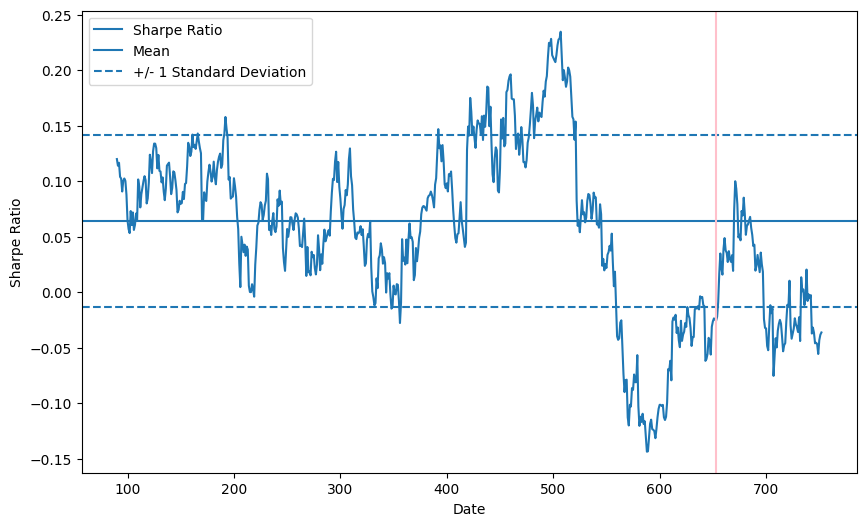

In [9]:
mean_rs = np.mean(running_sharpe[:-100])
std_rs = np.std(running_sharpe[:-100])

print(f'Mean: {mean_rs}, Standard deviation: {std_rs}')

_, ax2 = plt.subplots(figsize=(10, 6))
# ax2.set_xticklabels([int(pricing.index[i]) for i in ticks[:-1]]) # Label x-axis with dates
ax2.plot(range(90, len(returns)), running_sharpe)

# Plot its mean and the +/- 1 standard deviation lines
ax2.axhline(mean_rs)
ax2.axhline(mean_rs + std_rs, linestyle='--')
ax2.axhline(mean_rs - std_rs, linestyle='--')

# Indicate where we computed the mean and standard deviations
# Everything after this is 'out of sample' which we are comparing with the estimated mean and std
ax2.axvline(len(returns) - 100, color='pink');
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend(['Sharpe Ratio', 'Mean', '+/- 1 Standard Deviation'])
plt.show()

## Example: Moving Average

In [10]:
start = '2012-01-01'
end = '2015-01-01'

pricing = yf.download('AMZN', start=start, end=end)
pricing

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.7945,8.9740,8.7775,8.9515,8.9515,102216000
2012-01-04,8.9605,9.0250,8.8035,8.8755,8.8755,84104000
2012-01-05,8.7970,8.9125,8.7025,8.8805,8.8805,76182000
2012-01-06,8.9035,9.2325,8.8750,9.1305,9.1305,140168000
2012-01-09,9.1380,9.2185,8.8500,8.9280,8.9280,101138000
...,...,...,...,...,...,...
2014-12-24,15.3190,15.3500,15.1440,15.1515,15.1515,30276000
2014-12-26,15.2500,15.5390,15.1905,15.4545,15.4545,57876000
2014-12-29,15.3925,15.7135,15.3290,15.6020,15.6020,60180000


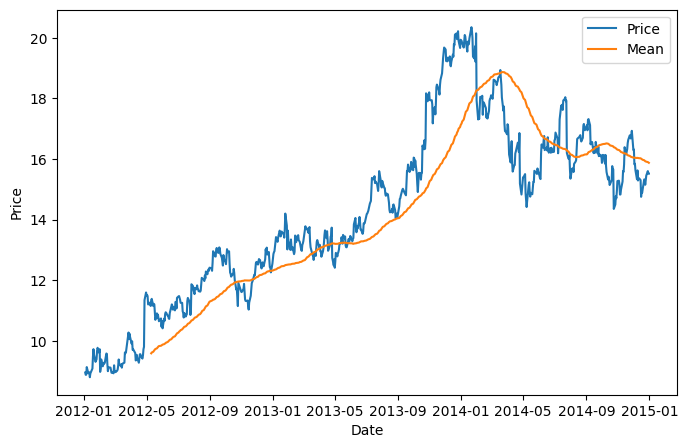

In [11]:
mu = pricing['Close'].rolling(90).mean()

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(pricing.index, pricing['Close'])
ax.plot(pricing.index, mu)
ax.set_ylabel('Price')
ax.set_xlabel('Date')
plt.legend(['Price', 'Mean'])
plt.show()

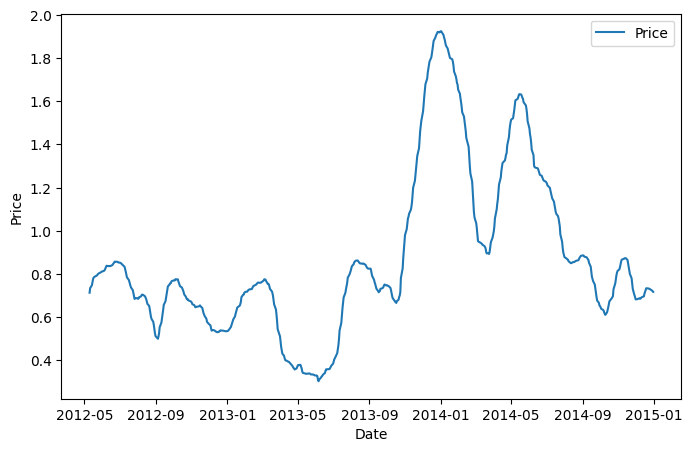

In [12]:
std = pricing['Close'].rolling(90).std()

fig, ax = plt.subplots(figsize=(8, 5))
# ax.plot(pricing.index, pricing['Close'])
ax.plot(pricing.index, std)
ax.set_ylabel('Price')
ax.set_xlabel('Date')
plt.legend(['Price', 'Mean'])
plt.show()

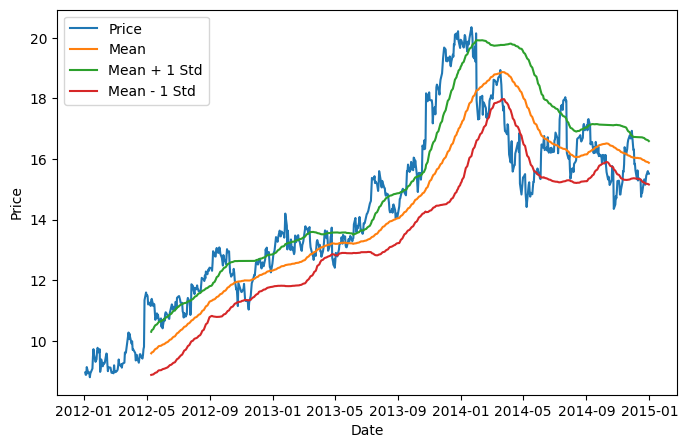

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(pricing.index, pricing['Close'])
ax.plot(pricing.index, mu)
ax.plot(pricing.index, mu + std)
ax.plot(pricing.index, mu - std)
ax.set_ylabel('Price')
ax.set_xlabel('Date')
plt.legend(['Price', 'Mean', 'Mean + 1 Std', 'Mean - 1 Std'])
plt.show()

## Questions

In [14]:
from statsmodels.stats.stattools import jarque_bera

In [15]:
# 1. Sample Size vs. Standard Deviation

POPULATION_MU = 100
POPULATION_SIGMA = 25
sample_sizes = [5, 25, 10, 500]

for sample_size in sample_sizes:
    data = np.random.normal(loc=POPULATION_MU, scale=POPULATION_SIGMA, size=sample_size)
    print(f'mean: {np.mean(data)} standard deviation: {np.std(data)}')

mean: 99.44175133199482 standard deviation: 19.891881100806085
mean: 101.7312050175592 standard deviation: 27.56976553770326
mean: 102.98671705073608 standard deviation: 11.002515955482098
mean: 99.94106085799149 standard deviation: 25.14097265458003


In [16]:
# 2. Instability of Predictions on Mean Alone

X = [ 31.,   6.,  21.,  32.,  41.,   4.,  48.,  38.,  43.,  36.,  50., 20.,  46.,  33.,   8.,  27.,  17.,  44.,  16.,  39.,   3.,  37.,
        35.,  13.,  49.,   2.,  18.,  42.,  22.,  25.,  15.,  24.,  11., 19.,   5.,  40.,  12.,  10.,   1.,  45.,  26.,  29.,   7.,  30.,
        14.,  23.,  28.,   0.,  34.,   9.,  47.]
Y = [ 15.,  41.,  33.,  29.,   3.,  28.,  28.,   8.,  15.,  22.,  39., 38.,  22.,  10.,  39.,  40.,  24.,  15.,  21.,  25.,  17.,  33.,
        40.,  32.,  42.,   5.,  39.,   8.,  15.,  25.,  37.,  33.,  14., 25.,   1.,  31.,  45.,   5.,   6.,  19.,  13.,  39.,  18.,  49.,
        13.,  38.,   8.,  25.,  32.,  40.,  17.]
Z = [ 38.,  23.,  16.,  35.,  48.,  18.,  48.,  38.,  24.,  27.,  24., 35.,  37.,  28.,  11.,  12.,  31.,  -1.,   9.,  19.,  20.,   0.,
        23.,  33.,  34.,  24.,  14.,  28.,  12.,  25.,  53.,  19.,  42., 21.,  15.,  36.,  47.,  20.,  26.,  41.,  33.,  50.,  26.,  22.,
        -1.,  35.,  10.,  25.,  23.,  24.,   6.]
print(f'Means: X = {np.mean(X)}, Y = {np.mean(Y)}, Z = {np.mean(Y)}')

Means: X = 25.0, Y = 24.686274509803923, Z = 24.686274509803923


In [19]:
alpha = 0.05
for i in [X, Y, Z]:
    output = jarque_bera(i)
    if output[1] > alpha:
        print('Not normal')
    else:
        print('Normal')

Not normal
Not normal
Not normal


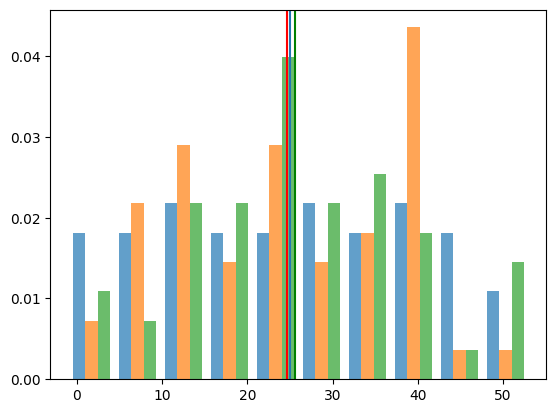

In [24]:
plt.hist([X, Y, Z], density=True, histtype='bar', stacked=False, alpha = 0.7);
plt.axvline(np.mean(X));
plt.axvline(np.mean(Y), c='r');
plt.axvline(np.mean(Z), c='g');

In [25]:
# 3. Sharpe Ratio Window Adjustment

start = '2010-01-01'
end = '2015-01-01'

treasury_return = yf.download('BIL', start=start, end=end)['Close'].pct_change()[1:]
pricing = yf.download('THO', start=start, end=end)['Close']
returns = pricing.pct_change()[1:]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [26]:
for window in [50, 150, 300]:
    running_sharpe = [sharpe_ratio(returns[i-window+10:i], treasury_return[i-window+10:i]) for i in range(window-10, len(returns))]
    mean_rs = np.mean(running_sharpe[:-200])
    std_rs = np.std(running_sharpe[:-200])

    print(f'Sharpe Mean (window - {window}): {mean_rs}, std: {std_rs}')

Sharpe Mean (window - 50): 0.037832852338436536, std: 0.15220074781658546
Sharpe Mean (window - 150): 0.041624548790347056, std: 0.06994917454064245
Sharpe Mean (window - 300): 0.03932423455732389, std: 0.04086960028787395


In [28]:
b15_df = pd.DataFrame([ 29.,  22.,  19.,  17.,  19.,  19.,  15.,  16.,  18.,  25.,  21.,
        25.,  29.,  27.,  36.,  38.,  40.,  44.,  49.,  50.,  58.,  61.,
        67.,  69.,  74.,  72.,  76.,  81.,  81.,  80.,  83.,  82.,  80.,
        79.,  79.,  80.,  74.,  72.,  68.,  68.,  65.,  61.,  57.,  50.,
        46.,  42.,  41.,  35.,  30.,  27.,  28.,  28.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W')          )

#Your code goes here

b15_mean = np.mean(b15_df['Weekly Avg Temp'])
b15_std = np.std(b15_df['Weekly Avg Temp'])

print("Boston Weekly Temp Mean: ", b15_mean)
print("Boston Weekly Temp Std:  ", b15_std)

Boston Weekly Temp Mean:  49.07692307692308
Boston Weekly Temp Std:   22.983979498978574


In [29]:
p15_df = pd.DataFrame([ 49.,  53.,  51.,  47.,  50.,  46.,  49.,  51.,  49.,  45.,  52.,
        54.,  54.,  55.,  55.,  57.,  56.,  56.,  57.,  63.,  63.,  65.,
        65.,  69.,  67.,  70.,  67.,  67.,  68.,  68.,  70.,  72.,  72.,
        70.,  72.,  70.,  66.,  66.,  68.,  68.,  65.,  66.,  62.,  61.,
        63.,  57.,  55.,  55.,  55.,  55.,  55.,  48.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

#Your code goes here

p15_mean = np.mean(p15_df['Weekly Avg Temp'])
p15_std = np.std(p15_df['Weekly Avg Temp'])

print("Palo Alto Weekly Temp Mean: ", p15_mean)
print("Palo Alto Weekly Temp Std:  ", p15_std)

Palo Alto Weekly Temp Mean:  59.78846153846154
Palo Alto Weekly Temp Std:   7.9743254801835945


Avg of Absolute Value of Prediction Error in Boston: 20.810650887573964
Avg of Absolute Value of Prediction Error in Palo Alto: 7.208579881656805


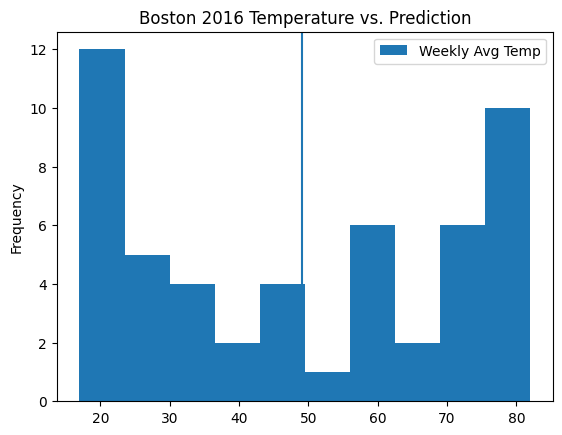

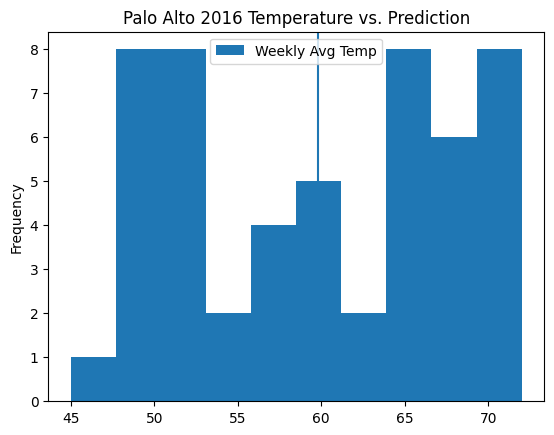

In [30]:
b16_df = pd.DataFrame([ 26.,  22.,  20.,  19.,  18.,  19.,  17.,  17.,  19.,  20.,  23., 22.,  28.,  28.,  35.,  38.,  42.,  47.,  49.,  56.,  59.,  61.,
        61.,  70.,  73.,  73.,  73.,  77.,  78.,  82.,  80.,  80.,  81., 78.,  82.,  78.,  76.,  71.,  69.,  66.,  60.,  63.,  56.,  50.,
        44.,  43.,  34.,  33.,  31.,  28.,  27.,  20.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

p16_df = pd.DataFrame([ 50.,  50.,  51.,  48.,  48.,  49.,  50.,  45.,  52.,  50.,  51., 52.,  50.,  56.,  58.,  55.,  61.,  56.,  61.,  62.,  62.,  64.,
        64.,  69.,  71.,  66.,  69.,  70.,  68.,  71.,  70.,  69.,  72., 71.,  66.,  69.,  70.,  70.,  66.,  67.,  64.,  64.,  65.,  61.,
        61.,  59.,  56.,  53.,  55.,  52.,  52.,  51.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

#Your code goes here

b16_df.plot.hist(title = "Boston 2016 Temperature vs. Prediction");
plt.axvline(b15_mean);

p16_df.plot.hist(title = "Palo Alto 2016 Temperature vs. Prediction");
plt.axvline(p15_mean);

b_avg_error = np.mean(abs(b16_df['Weekly Avg Temp'] - b15_mean))
p_avg_error = np.mean(abs(p16_df['Weekly Avg Temp'] - p15_mean))

print("Avg of Absolute Value of Prediction Error in Boston:", b_avg_error)
print("Avg of Absolute Value of Prediction Error in Palo Alto:", p_avg_error)